# 🌟 Semana 3 – Notebook de Práctica ML (local)

Este cuaderno tiene **dos partes**:
1. **Parte A – Desde cero (sin librerías de ML)**
2. **Parte B – Con scikit-learn**

Dataset: `horas_estudio` → `nota`.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('datos_estudio.csv')
data.head()


,horas_estudio,nota
0,0.0,5.0
1,1.0,7.0
2,2.0,8.0
3,3.0,9.0
4,4.0,10.0


## Parte A – Regresión lineal **desde cero**



In [4]:
X = data['horas_estudio'].values
y = data['nota'].values

m, b = 0.0, 0.0   # parámetros iniciales
eta = 0.001       # tasa de aprendizaje
epochs = 5000     # número de iteraciones
loss_history = []

for epoch in range(epochs):
    y_hat = m * X + b
    error = y_hat - y
    mse = (error ** 2).mean()
    loss_history.append(mse)

    dm = 2 * (X * error).mean()
    db = 2 * error.mean()

    m -= eta * dm
    b -= eta * db

m, b, loss_history[-1]


(np.float64(1.3402276825296608),
 np.float64(5.092125127199832),
 np.float64(0.12234972097614367))

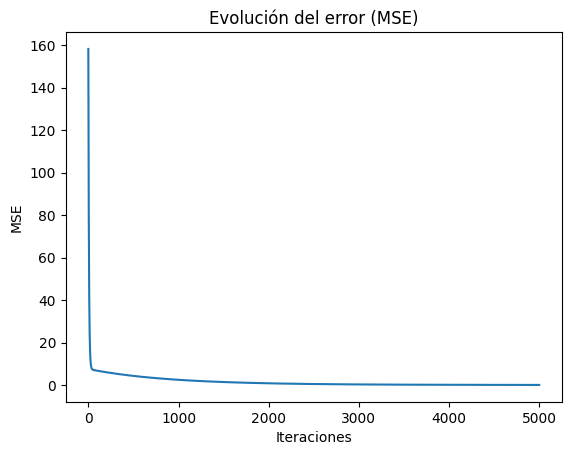

In [7]:
plt.plot(loss_history)
plt.title('Evolución del error (MSE)')
plt.xlabel('Iteraciones')
plt.ylabel('MSE')
plt.show()


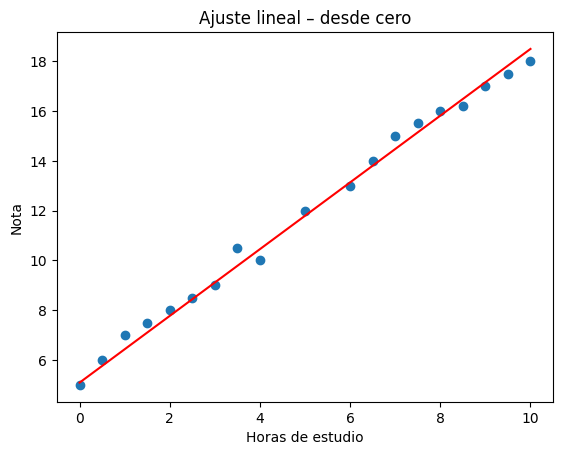

In [6]:
plt.scatter(X, y)
x_line = np.linspace(X.min(), X.max(), 100)
y_line = m * x_line + b
plt.plot(x_line, y_line, color='red')
plt.xlabel('Horas de estudio')
plt.ylabel('Nota')
plt.title('Ajuste lineal – desde cero')
plt.show()


In [8]:
horas = 7
nota_predicha = m * horas + b
nota_predicha


np.float64(14.473718904907457)

In [9]:
for h in [0, 2, 4, 6, 8, 10]:
    print(h, round(m*h + b, 2))


0 5.09
2 7.77
4 10.45
6 13.13
8 15.81
10 18.49


In [10]:
for h in [0, 5, 10, 15, 20]:
    nota_predicha = m*h + b
    print(f"{h} horas → {nota_predicha:.2f}")


0 horas → 5.09
5 horas → 11.79
10 horas → 18.49
15 horas → 25.20
20 horas → 31.90


## Parte B – Regresión lineal con scikit-learn


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_mat = data[['horas_estudio']].values
y_vec = data['nota'].values
X_train, X_test, y_train, y_test = train_test_split(X_mat, y_vec, test_size=0.2, random_state=42)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

print("Coeficiente (pendiente):", linreg.coef_)
print("Intersección (b):", linreg.intercept_)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))


Coeficiente (pendiente): [1.28853288]
Intersección (b): 5.444322653175941
MSE: 0.07235218352991529
R2: 0.9900203884786324


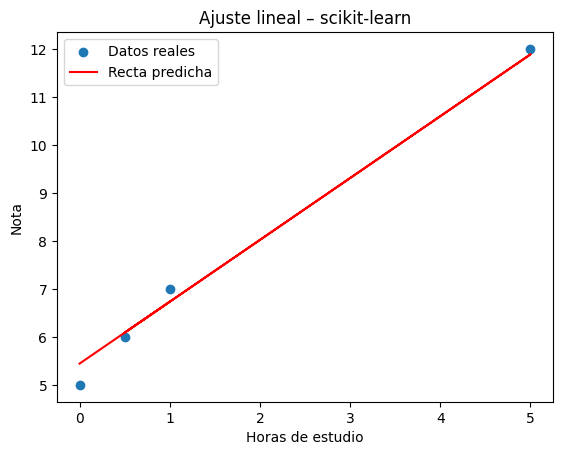

In [12]:
plt.scatter(X_test, y_test, label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Recta predicha')
plt.xlabel('Horas de estudio')
plt.ylabel('Nota')
plt.title('Ajuste lineal – scikit-learn')
plt.legend()
plt.show()


In [13]:
nuevas_horas = np.array([0, 2, 4, 6, 8, 10]).reshape(-1, 1)
pred_nuevas = linreg.predict(nuevas_horas)
list(zip(nuevas_horas.ravel(), pred_nuevas.round(2)))


[(np.int64(0), np.float64(5.44)),
 (np.int64(2), np.float64(8.02)),
 (np.int64(4), np.float64(10.6)),
 (np.int64(6), np.float64(13.18)),
 (np.int64(8), np.float64(15.75)),
 (np.int64(10), np.float64(18.33))]